## THE MNIST DATABASE

![Mnistdata.png](img/Mnistdata.png)

### 1.Description
This notebook contains information about the MNIST data set.The purpose of this notebook is to explain how to
read the MNIST dataset efficiently into memory in Python.

### 2.What is the MNIST dataset?
The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem. Images of digits were taken from a variety of scanned documents, normalized in size and centered. MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing.

#### The dataset consists of pair, “handwritten digit image” and “label”. Digit ranges from 0 to 9, meaning 10 patterns in total.
- __handwritten digit image:__ This is gray scale image with size 28 x 28 pixel  square (784 pixels total). A standard spit of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.
- __label :__ This is actual digit number this handwritten digit image represents. It is either  0 to 9. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

![mnist_plot.png](img/mnist_plot.png)

## 3. How is stored?
The training and testing data of the MNIST database is stored in compressed IDX formatted files. It is a binary file format. The IDX file format is a simple format for vectors and multidimensional matrices of various numerical types. Reason for storing data in that format is a performance and memory requirements. Binary file formats are far better than text file formats like CSV. Storing data in binary format takes less memory, which is really an added advantage when a large volume of data needs to be stored. Information about __IDX file format__ can be found [here](http://www.fon.hum.uva.nl/praat/manual/IDX_file_format.html).

The basic format is

magic number<br>
 size in dimension 0<br>
 size in dimension 1<br>
 size in dimension 2<br>
 …..<br>
 size in dimension N<br>
 data<br>
 
The magic number is an integer (MSB first). The first 2 bytes are always 0.<br>

The third byte codes the type of the data:<br>
 0x08: unsigned byte<br>
 0x09: signed byte<br>
 0x0B: short (2 bytes)<br>
 0x0C: int (4 bytes)<br>
 0x0D: float (4 bytes)<br>
 0x0E: double (8 bytes)<br>
 
The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices….<br>
The sizes in each dimension are 4-byte integers (MSB first, high endian, like in most non-Intel processors).<br>
The data is stored like in a C array, i.e. the index in the last dimension changes the fastest.<br>


### 3.1 Explanation
__TRAINING SET IMAGE FILE (train-images-idx3-ubyte):__<br>
[offset] [type] [value] [description]<br>
 0000 32 bit integer 0x00000803(2051) magic number<br>
 0004 32 bit integer 60000 number of images<br>
 0008 32 bit integer 28 number of rows<br>
 0012 32 bit integer 28 number of columns<br>
 0016 unsigned byte ?? pixel<br>
 0017 unsigned byte ?? pixel<br>
 ……..<br>
 xxxx unsigned byte ?? pixel<br>
 
In magic number magic number the first two digits are 0x00 and 0x00, where each HEX digit is represented by 4 binary bits. So, two HEX digits makes a 8-bit binary number or a byte. The 3rd byte is the type of data, which is 0x08, the data format is unsigned byte having value from 0 to 255. The 4th byte is the number of dimensions, which is 0x03. The next 3 bytes give information about the sizes of the data in the 3 dimensions.<br>
Each byte from 16th byte onward, contains pixel data, and the type of the data is unsigned byte, i.e. each pixel data is contained in a 8-bit binary digit, having value from 0 to 255.

### 4. Prepare the data
Remember to download four files wich are required for this notebook:

- train-images-idx3-ubyte: training set images 
- labels-idx1-ubyte: training set labels 
- t10k-images-idx3-ubyte:  test set images 
- t10k-labels-idx1-ubyte:  test set labels

You can find them under this [link](http://yann.lecun.com/exdb/mnist/). Next create folder called __data__ and save those files. 


Reading the uncompressed file train-images-idx3-ubyte with 60000 images of 28×28 pixel data, will result in a new Matrix object with 60000 rows and 784 (=28×28) columns. Each cell will contain a number in the interval from 0 to 255.

Reading the uncompressed file train-labels-idx1-ubyte with 60000 labels will result in a new Matrix object with 1 row and 60000 columns. Each cell will contain a number in the interval from 0 to 9.

###  4.1 Unzip the files 
To unzip the files we can use Python Library which is called __gzip__ . Source code and more information about it can be found  [here](https://docs.python.org/3/library/gzip.html).

#### 4.1.1 TEST SET IMAGE FILE (t10k-images-idx3-ubyte)

In [1]:
# Source code adapted from https://docs.python.org/3/library/gzip.html
# Import gzip
import gzip 

# Read bytes from files
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()
    

#### 4.1.2 TEST SET LABEL FILE (t10k-labels-idx1-ubyte)

In [2]:
# Source code adapted from https://docs.python.org/3/library/gzip.html
# Import gzip
import gzip 

# Read bytes from files
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

###  4.2 Determine file type
Python supports a range of types to store sequences. There are six sequence types: strings, byte sequences (bytes objects), byte arrays (bytearray objects), lists, tuples, and range objects.

#### 4.2.1 TEST SET IMAGE FILE (t10k-images-idx3-ubyte)

In [3]:
# Checks type of file content
type(file_content)

bytes

In [4]:
# Find out what first 4 bits are
file_content[0:4]

b'\x00\x00\x08\x03'

#### 4.2.2 TEST SET LABEL FILE (t10k-labels-idx1-ubyte)

In [5]:
# Checks type of file content
type(labels)

bytes

In [6]:
# Find out what first 4 bits are
labels[0:4]

b'\x00\x00\x08\x01'

### 4.3. Convert Bytes to Integer
The bytes type in Python is immutable and stores a sequence of values ranging from 0-255 (8-bits). You can get the value of a single byte by using an index like an array, but the values can not be modified.

#### 4.3.1 TEST SET IMAGE FILE (t10k-images-idx3-ubyte)

In [7]:
# Source code adapted from: https://docs.python.org/3/library/stdtypes.html
# First four bytes to int
int.from_bytes(file_content[0:4], byteorder='big')

2051

#### 4.3.2 TEST SET LABEL FILE (t10k-labels-idx1-ubyte)

In [8]:
# Source code adapted from: https://docs.python.org/3/library/stdtypes.html
# First four bytes to int
int.from_bytes(labels[0:4], byteorder='big')

2049

### OR

In [9]:
# Source code adapted from: https://docs.python.org/3/library/stdtypes.html
# First four bytes to int
int.from_bytes(b'\x00\x00\x08\x03', byteorder='big')

2051

In [10]:
# Source code adapted from: https://docs.python.org/3/library/stdtypes.html
# First four bytes to int
int.from_bytes(b'\x00\x00\x08\x01', byteorder='big')

2049

The __byteorder__ argument determines the byte order used to represent the integer. If byteorder is "big", the most significant byte is at the beginning of the byte array. If byteorder is "little", the most significant byte is at the end of the byte array. Check this [link](https://en.wikipedia.org/wiki/Endianness) if you want to find out more about little and big endian.  

In [11]:
# TEST SET IMAGE FILE (t10k-images-idx3-ubyte)
print("Number of images in a file: {}. ".format(int.from_bytes(file_content[4:8], byteorder='big')))
print("Number of rows in a file: {}. ".format(int.from_bytes(file_content[8:12], byteorder='big')))
print("Number of columns in a file: {}. ".format(int.from_bytes(file_content[12:16], byteorder='big')))

Number of images in a file: 10000. 
Number of rows in a file: 28. 
Number of columns in a file: 28. 


In [12]:
# TEST SET LABEL FILE (t10k-labels-idx1-ubyte)
print("Number of items in a file: {}. ".format(int.from_bytes(labels[4:8], byteorder='big')))
print("Integer : {} ".format(int.from_bytes(labels[8:9], byteorder='big')))
print("Integer : {}  ".format(int.from_bytes(labels[15:16], byteorder='big')))

Number of items in a file: 10000. 
Integer : 7 
Integer : 9  


### 5. Read a single image

In [13]:
l = file_content[16:800]

In [14]:
type(l)

bytes

In [15]:
import numpy as np

In [16]:
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

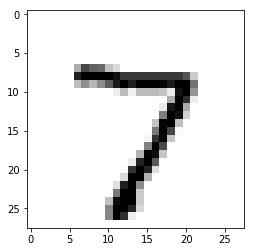

In [19]:
import matplotlib.pyplot as plt

plt.imshow(image,cmap='gray')

### 6. Save image 
To save image from numpy array we can use __PIL__- Python Imaging Library which is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. The Image module provides a class with the same name which is used to represent a PIL image. The module also provides a number of factory functions, including functions to load images from files, and to create new images.

In [18]:
# Source code adaptedfrom:https://stackoverflow.com/questions/6915106/saving-a-numpy-array-as-an-image-instructions
# Import Image from PIL 
from PIL import Image
# Takes image from numpy array
im = Image.fromarray(image)
# Saves as png image
im.save("img/number.png")
# Saves as jpeg image
im.save("img/number.jpeg")

### References:

https://corochann.com/mnist-dataset-introduction-1138.html

https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

https://www.w3resource.com/python/python-bytes.php

https://docs.python.org/3/library/gzip.html

https://docs.python.org/3/library/stdtypes.html

https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1

https://pillow.readthedocs.io/en/3.1.x/reference/Image.html